In [1]:
%matplotlib inline

# _Grid_ celular

## Prof. Tarcisio F. Maciel, Dr.-Ing., [maciel@ufc.br](mailto:maciel@ufc.br)

## Objetivo
O objetivo desta atividade é a construção de _grids_ celulares homogêneos e heterogêneos.

## Observações
1. Todo o código (nomes de variáveis, funções, comentários) em Python deve ser em inglês.
2. No Python, utilize números complexos para representar coordenadas.
3. Procure usar ```numpy``` como base todo o código de modo que o mesmo funcione para escalares e _arrays_.

## Grid celular hexagonal regular/homogêneo

Os sistemas celulares foram construídos sobre o conceito de reuso de frequência, em que uma determinada porção do espectro é reutilizada em diferentes áreas geográficas controlando-se a distância entre as áreas que fazem uso do mesma porção do espectro. Consulte a Seção 3.2 do livro _Wireless Communications: Principles and Practice_, 2a Edição, do autor Theodore S. Rappaport, que descreve o conceito de reuso de frequência e sua relação com _grids_ celulares.

Nesse contexto, apenas alguns poucos polígonos regulares (triângulos, quadriláteros, hexágonos, etc.) podem ser utilizados para cobrir uma determinada área sem deixar lacunas entre os polígonos. Em particular, as células de um sistema célular em _grid_ regular/homogêneo são convencionamente modelados utilizando hexágonos. Além disso, as células são normalmente organizadas em _clusters_ dentro do qual as frequências atribuídas (porções do espectro) são distintas. Para um _grid_ regular/homogêneo com células hexagonais, o número $N$ de células por _cluster_ só pode ser construído com valores que satisfação a relação:
$$
N = i^2 + ij + j^2, \quad \text{com} \quad i, j \in \mathbb{N}, i, j \geq 0.
$$
De fato:
- No reúso 1/1: um _cluster_ é composto por uma única célula hexagonal.
- No reúso 1/3: um _cluster_ é composto por uma três células hexagonais.
- No reúso 1/4: um _cluster_ é composto por uma quatro células hexagonais.
- No reúso 1/7: um _cluster_ é composto por uma sete células hexagonais.

_Clusters_ de células hexagonais dispostas segundo os reúsos 1/3, 1/4 e 1/7 são ilustradas na Figura 2.5 do livro Comunicação Móvel Celular, autor F. Rodrigo P. Cavalcant _et al_.

## Questão 1

Consulte a Fig. 3.2 do livro _Wireless Communications: Principles and Practice_ e escreva uma função ```cell_grid``` em Python que gere um _cluster_ com $N = \{1, 3, 4, 7, 9\}$ células de raio unitário. $N$ deve ser passado como parâmetro. Considere que a primeira célula está posicionada na origem do sistema de coordenadas. Note que o centro das 6 próximas células em um _cluster_ de até 7 células podem ser geradas rotacionando-se em passos de 60 graus um vetor (ou número complexo) de comprimento (módulo) e fase inicial adequados. Usando sua função, gere e plot (crie uma função para desenhar hexágonos) _clusters_ de células para os valores de $N$ indicados acima. Em particular, para o _cluster_ com 9 células, organize as mesmas de modo que estas fiquem dispostas aproximademente em um quadrilátero. Ao plotar suas células, numere as mesmas com seu número dentro do _cluster_, o qual também pode indexar a porção do espectro a ela alocada, conforme a Figura 2.5 do livro Comunicação Móvel Celular.

Entrada inválida ->  10 .
Entrada inválida ->  0 .
Entrada inválida ->  -5 .


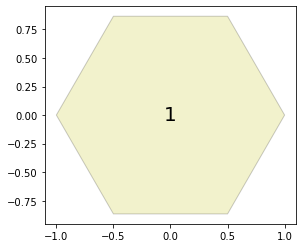

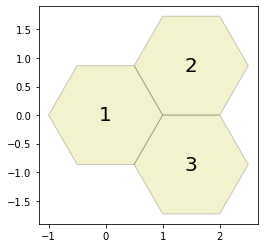

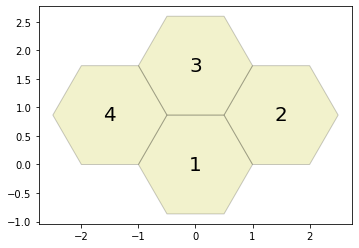

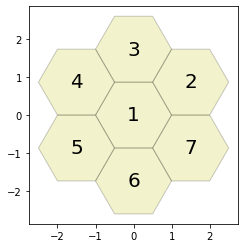

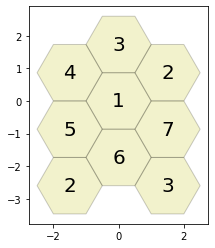

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import RegularPolygon

def cell_grid(n):
    if n <= 0 or n > 9:
        return print("Entrada inválida -> ", n, ".")
    fig, axs = plt.subplots()
    axs.autoscale()
    axs.set_aspect('equal')
    i = complex(0,0)
    if n <= 9:
        hex = RegularPolygon((i.real,i.imag), numVertices=6, radius=1, orientation= np.deg2rad(30), facecolor='y', 
                     alpha=0.2, edgecolor='k')
        axs.text(i.real, i.imag, '1', horizontalalignment= 'center', verticalalignment= 'center', fontsize=20)
        axs.add_patch(hex)
    if n <= 3:
        i = complex(1.5,0.866)
        for k in range(1,n):
            hex = RegularPolygon((i.real,i.imag), numVertices=6, radius=1, orientation= np.deg2rad(30), facecolor='y', 
                     alpha=0.2, edgecolor='k')
            axs.text(i.real, i.imag, k+1, horizontalalignment= 'center', verticalalignment= 'center', fontsize=20)
            axs.add_patch(hex)
            i = i*complex(0.5,-0.866)
    if n > 3 and n <= 7:
        i = complex(1.5,0.866)
        for k in range(1,n):
            hex = RegularPolygon((i.real,i.imag), numVertices=6, radius=1, orientation= np.deg2rad(30), facecolor='y', 
                     alpha=0.2, edgecolor='k')
            axs.text(i.real, i.imag, k+1, horizontalalignment= 'center', verticalalignment= 'center', fontsize=20)
            axs.add_patch(hex)
            i = i*complex(0.5,0.866)
    if n > 7 and n <= 9:
        i = complex(1.5,0.866)
        for k in range(1,n):
            hex = RegularPolygon((i.real,i.imag), numVertices=6, radius=1, orientation= np.deg2rad(30), facecolor='y', 
                     alpha=0.2, edgecolor='k')
            axs.text(i.real, i.imag, k+1, horizontalalignment= 'center', verticalalignment= 'center', fontsize=20)
            axs.add_patch(hex)
            i = i*complex(0.5,0.866)
            if n >= 8 and k == 3:
                i2 = i + complex(0,-np.sqrt(3))
                hex = RegularPolygon((i2.real,i2.imag), numVertices=6, radius=1, orientation= np.deg2rad(30), facecolor='y', 
                     alpha=0.2, edgecolor='k')
                axs.text(i2.real, i2.imag, '2', horizontalalignment= 'center', verticalalignment= 'center', fontsize=20)
                axs.add_patch(hex)
            if n == 9 and k == 5:
                i3 = i + complex(0,-np.sqrt(3))
                hex = RegularPolygon((i3.real,i3.imag), numVertices=6, radius=1, orientation= np.deg2rad(30), facecolor='y', 
                     alpha=0.2, edgecolor='k')
                axs.text(i3.real, i3.imag, '3', horizontalalignment= 'center', verticalalignment= 'center', fontsize=20)
                axs.add_patch(hex)
            if n >= 8 and k == 6:
                break


cell_grid(1)
cell_grid(3)
cell_grid(4)
cell_grid(7)
cell_grid(9)
#Entradas Inválidas
cell_grid(10)
cell_grid(0)
cell_grid(-5)

## Questão 2

Um _grid_ celular é normalmente representado por um _cluster_ central acompanhado de um número de _clusters_ adjacentes que agem com um _anel_ de interferentes. As células nos _clusters_ adjacentes seguem o mesmo padrão do _cluster_ central, ou seja, suas células reusam as mesmas frequências que as células correspondentes no _cluster_ central. Cada conjunto de células que reusam as mesmas frequências são denominadas interferentes co-canal. _Clusters_ compostos por células hexagonais co-canal dispostas segundo os reúsos 1/3, 1/4 e 1/7 são ilustradas na Figura 2.5 do livro Comunicação Móvel Celular, autor F. Rodrigo P. Cavalcant _et al_, em que as frequências usadas por cada célula são numeradas de $n = 1,\ldots, N$. Para cada célula do _cluster_ central, conforme a Seção 3.2 do livro _Wireless Communications: Principles and Practice_, os 7 interferentes co-canal mais próximos podem ser localizados seguindo $i$ células ao longo da cadeia de células alinhada à celula de interesse, girando então 60 graus, e seguindo $j$ a partir dessa nova direção. Utilizando esse princípio, uma função ```cell_grid_interf``` que gere não só o _cluster_ central, mas também os 6 _clusters_ de células interferentes em torno do _cluster_ central. Usando sua função, gere e plot o conjunto de 7 _clusters_ gerado.

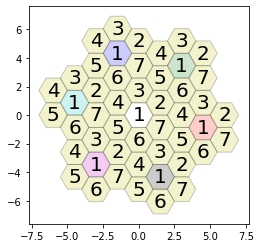

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import RegularPolygon

def cell_grid_interf():
    fig, axs = plt.subplots()
    axs.autoscale()
    axs.set_aspect('equal')
    c = ['w', 'r', 'g', 'b', 'c', 'm', 'k']
    i = complex(0,0)
    for y in range(1,8):
        if y == 2:
            i = i + complex(4.5,-np.sqrt(3)/2)
        if y > 2:
            i = i * complex(0.5,0.866)
        hex = RegularPolygon((i.real,i.imag), numVertices=6, radius=1, orientation= np.deg2rad(30), facecolor= c[y-1], 
                         alpha=0.2, edgecolor='k')
        axs.text(i.real, i.imag, '1', horizontalalignment= 'center', verticalalignment= 'center', fontsize=20)
        axs.add_patch(hex)
        j = i + complex(1.5,0.866)
        for k in range(2,8):
            hex = RegularPolygon((j.real,j.imag), numVertices=6, radius=1, orientation= np.deg2rad(30), facecolor= 'y', 
                         alpha=0.2, edgecolor='k')
            axs.text(j.real, j.imag, k, horizontalalignment= 'center', verticalalignment= 'center', fontsize=20)
            axs.add_patch(hex)
            j = j * complex(0.5,0.866)
    
    
cell_grid_interf()